# 4: Corpus Statistics

* Advanced word counting
* Advanced sorting
* Simple statistics
* Comparing corpora
* T/F questions

## Advanced counting

Let's get counts of words from the Brown again, using a Counter:

In [1]:
from collections import Counter
from nltk.corpus import brown

counts = Counter(brown.words())

Often you need to normalize the counts in a dictionary, to create a word probability distribution. You can keep a running total or, more conveniently, just [sum](https://docs.python.org/3/library/functions.html#sum) the values of your count dict (you can also use `np.sum`). If you've done this right, your new values should sum to 1 (or close enough).

In [2]:
total_tokens = sum(counts.values())

probs = {}

for word in counts:
    probs[word] = counts[word]/total_tokens
    
print(counts["the"])
print(probs["the"])

62713
0.05400743374050114


In [3]:
print(sum(probs.values()))

0.999999999999049


Question: Why would word probability be more useful than raw counts when we are trying to use statistics to characterize corpora?

Answer: Corpora can be of vastly different sizes, and those sizes will have a direct effect on word count. For example, one corpus might have 1 mention of the word _dog_ and another might have 100. This might indicate the second corpus talks a lot more about dogs, or it might just indicate that the second one is 100X as large.

For easy interpretability and to avoid low numbers, one often multiples these normalized word probabilities by some large number like 1000, at which point the resulting number can be understood as X occurrences per 1000 tokens.

In [4]:
for word in probs:
    probs[word] *= 1000
    
print(probs["the"])

54.00743374050114


Another common use case involving counts is removing words with high or low counts, which are often uninteresting or statistically unreliable. This is tricky, because in Python you can't delete from something you're iterating over! Unless you're very worried about lack of memory, usually easier to just create a new dictionary.

In [5]:
new_counts = {word:count for word, count in counts.items() if 5 < count < 1000}
print(len(counts))
print(len(new_counts))


56057
13057


If you're just interested in the highest (or lowest) count item, it is easy enough just to iterate over the dictionary once and remember the top scoring item.

In [6]:
highest_count_word = None
highest_count = 0

for word, count in counts.items():
    if count > highest_count:
        highest_count = count
        highest_count_word = word

print(highest_count_word)
print(highest_count)

the
62713


But if you're using a Counter object, the [most_common](https://docs.python.org/3/library/collections.html#collections.Counter.most_common) method is often handy. Counters have a few other neat options, for instance they can be added and subtracted (though, unlike `update`, this creates a new Counter).

In [7]:
counts.most_common(25)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011),
 ('was', 9777),
 ('for', 8841),
 ('``', 8837),
 ("''", 8789),
 ('The', 7258),
 ('with', 7012),
 ('it', 6723),
 ('as', 6706),
 ('he', 6566),
 ('his', 6466),
 ('on', 6395),
 ('be', 6344),
 (';', 5566),
 ('I', 5161),
 ('by', 5103)]

In [8]:
from nltk.corpus import treebank
treebank_counts = Counter(treebank.words())
both_counts = counts + treebank_counts
print(both_counts.most_common(10))

[('the', 66758), (',', 63219), ('.', 53174), ('of', 38399), ('and', 29426), ('to', 27896), ('a', 23759), ('in', 21108), ('that', 11044), ('is', 10682)]


Beyond that, you'll want to do some sorting.

## Advanced sorting

As you've already seen, simple sorting of a list of objects in Python is fairly straightward. Use the [sort](https://docs.python.org/3/library/stdtypes.html#list.sort) method to sort in place, or [sorted](https://docs.python.org/3/library/functions.html#sorted) to create a new sorted list. Result is order from smallest to largest, use reverse keyword to reverse the order.

In [9]:
nums = [3, 6, -4, 23, 0.5, 202, -24592, 3482]

In [10]:
sorted(nums, reverse=True)

[3482, 202, 23, 6, 3, 0.5, -4, -24592]

In [11]:
nums

[3, 6, -4, 23, 0.5, 202, -24592, 3482]

In [12]:
nums.sort()

In [13]:
nums

[-24592, -4, 0.5, 3, 6, 23, 202, 3482]

Note that strings are generally sorted alphabetically, but once you get outside of a-z things can get unpredictable.

In [14]:
strings = ["aardvark", "Aardvark", "Zebra", "zebra", "12", "110", "2"]

sorted(strings)

['110', '12', '2', 'Aardvark', 'Zebra', 'aardvark', 'zebra']

Often, though, you have a statistic associated with a group of objects (words, documents, corpora, etc.), and want to sort the objects based on the statistic. One strategy is to create a list of tuples where the statistic is the first element of the tuple, since sort operates on the first element of each tuple first.

In [15]:
counts = {"the":87925, "quick":327, "brown":539, "fox":69}
sorted_counts = sorted([(count,word) for word,count in counts.items()])
sorted_counts


[(69, 'fox'), (327, 'quick'), (539, 'brown'), (87925, 'the')]

An similarly compact, elegant way is to use the `key` keyword for *sort/sorting* function which allows you to specify a function which will define the value to sort a given iterable. The typical way to specify the function for this is to use a [lambda expression](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions). One clear advantage of the `key` approach is that you just get the sorted list without having to deal with extracting what you need from tuples:

In [16]:
sorted_words = sorted(counts.keys(), key=lambda x: counts[x])
sorted_words

['fox', 'quick', 'brown', 'the']

Once you have a sorted list, you can use slicing to get what you want.

In [17]:
sorted_words[-2:]

['brown', 'the']

Let's use sorting with lambdas to get the 50 longest and shortest word types in the Penn Treebank corpus

In [18]:
sorted_by_length = sorted(set(treebank.words()), key=lambda x: len(x))
print(sorted_by_length[:50])
print(sorted_by_length[-50:])

['6', '7', '%', ';', 'A', '@', '9', '0', '#', '2', '3', '?', '-', 'G', '!', '.', '8', 'b', 'a', '`', '1', 'I', 'B', '$', 'R', '*', ':', '4', 'X', 'F', "'", '5', ',', '&', '20', "'m", 'Jr', '45', 'By', 'wo', 'An', '34', '--', '12', 'am', 'do', 'C.', '38', 'AN', 'us']
['computer-assisted', 'Arbitrage-related', 'constitutional-law', 'Property\\/casualty', 'school-improvement', 'financial-services', 'search-and-seizure', 'shareholder-rights', 'machine-gun-toting', 'housing-assistance', 'dollar-denominated', 'telecommunications', 'diethylstilbestrol', 'property\\/casualty', 'recession-inspired', 'stock-manipulation', 'acquisition-minded', 'larger-than-normal', 'newspaper-printing', 'investor-relations', 'yttrium-containing', 'Philadelphia-based', 'industry-supported', 'computer-generated', 'Corton-Charlemagne', 'Metallgesellschaft', 'identity-management', 'less-than-brilliant', 'disaster-assistance', 'multibillion-dollar', 'limited-partnership', 'automotive-lighting', '238,000-circulation',

Remember that are two other python built-in functions, [min](https://docs.python.org/3/library/functions.html#min) and [max](https://docs.python.org/3/library/functions.html#min) which get the minimum and maximum values. Like sort/sorted, they have a *key* keyword argument.

In [19]:
min(counts.items())

('brown', 539)

As you've seen elsewhere, there are more ways to sort when you are using numpy arrays or pandas dataframes, but that is beyond our scope here! When you're dealing with relatively simple situations (like word counts) and there is little benefit to be gained from vectorization, you probably don't want the overhead of converting to these formats: pure Python is easier.

## Simple statistics

The easiest sorts of corpus statistics to calculate are averages: e.g. average word length, average sentence length, average words per text.

In [20]:

def get_simple_stats(corpus):
    num_chars = sum([len(word) for word in corpus.words()])
    num_words = len(corpus.words())
    num_sents = len(corpus.sents())
    num_texts = len(corpus.fileids())
    print("average word length")
    print(num_chars/num_words)
    print("average sentence length")
    print(num_words/num_sents)
    print("average text length")
    print(num_words/num_texts)    

In [21]:
get_simple_stats(treebank)

average word length
4.406154396281139
average sentence length
25.722023505365357
average text length
505.90954773869345


One popular statistic for individual texts that reflects how varied the vocabulary used in the text is the type-token ratio (TTR), i.e.

\begin{equation*}
\frac {\text{No. of word types}}{\text{No. of word token}}
\end{equation*}

Note that when you are using it for comparison, you generally need to fix the number of tokens for the texts you're comparing, since TTR can be quite different for different numbers of tokens. As we've seen already seen, sets are an easy way to get the number of types, though normally you'll want to lower case first.

Let's generalize this into a function for use later

In [22]:
def type_token_ratio(words, num_words):
    '''calculate type-token ratio from the corpus of word tokens (list of strings) using the first
    num_words tokens'''
    type_set = set(word.lower() for word in words[:num_words])
    return len(type_set) / num_words

In [23]:
type_token_ratio(brown.words(), 1000)

0.417

In [24]:
type_token_ratio(brown.words(), 100000)

0.13082

The relative quantity of the main _closed-class_ part-of-speech can reflect the nature of a particular corpus. For example, narrative texts (like stories) have more verbs, and informational texts (like technical reports) tend to have more nouns. If we have POS tags, this is easy to calculate:

In [25]:
noun_count = 0
for word, pos in treebank.tagged_words():
    if pos[0] == "N":
        noun_count += 1
print(noun_count/len(treebank.words()))

0.2867316937502483


One popular POS summary statistic is lexical density, which can also be calculated using a POS-tagged corpus. It is the ratio of open-class words (nouns, verbs, adjectives, adverbs) to all words.

Some word classes are OPEN, that is, new words can be added to the class as the need arises. The class of nouns, for instance, is potentially infinite, since it is continually being expanded as new scientific discoveries are made, new products are developed, and new ideas are explored. In the late twentieth century, for example, developments in computer technology have given rise to many new nouns:

*Internet, website, URL, CD-ROM, email, newsgroup, bitmap, modem, multimedia*

New verbs have also been introduced:

*download, upload, reboot, right-click, double-click*

In [26]:
open_class_prefix = {"N", "V", "J", "R"}
open_class_total = 0
for word, pos in treebank.tagged_words():
    if pos[0] in open_class_prefix:
        open_class_total += 1
print(open_class_total/len(treebank.words()))

0.5076681632166554



Another class of popular corpus statistics are [readability metrics](https://en.wikipedia.org/wiki/List_of_readability_tests_and_formulas), for establishing how difficult a text is to read. You are implementing a version of one of the most popular in your lab. 

Of course, any word or POS sequence or otherwise easy identified linguistic property may be considered a potential statistic. For example, the code below counts English split infinitives (i.e. TO + RB + V) appear per 1000 words in the Brown (and prints them out). These particular construction was considered ungrammatical English by for hundreds of years, but it is actually quite common (e.g. in the opening to the _Star Trek_ TV show: _to boldly go where no man/one has gone before_)

<img src="https://i.imgur.com/P8t4dDL.png" style="width:300px;height:200px;">
(From OneirosTheWriter at sufficientvelocity.com) 


In [27]:
split_infinitives = 0
for sent in brown.tagged_sents():
    for i in range(len(sent) - 2):
        if sent[i][1] == "TO" and sent[i+1][1] == "RB" and sent[i+2][1][0] == "V":
            print(sent[i][0], sent[i+1][0], sent[i+2][0])
            split_infinitives += 1
            
print("Frequency per 100000 words")     
print(100000*split_infinitives/len(brown.words()))
    

to formally request
to completely bypass
to merely go
to properly express
to properly display
to even name
to magically influence
to actually move
to roughly calculate
to first drill
to first confront
to ever leave
to substantially lessen
to so notify
to fully serve
to promptly salvage
to virtually destroy
to approximately quadruple
to deliberately behave
to often seclude
to properly relate
to partially destroy
to accurately measure
to automatically hold
to deliberately foul
to gradually reach
to just throw
Frequency per 100000 words
2.3251968666680445


Corpus linguists use these methods to investigate how lingustic patterns of interest are being used!

## Comparing corpora

We count and sort words and derive corpus statistics primarily so we can identify differences between texts or corpora. Let's calculate and compare some basic stats for some corpora in NLTK.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def ordered_bar_from_dict(py_dict, title):
    '''create a bar chart from values in py_dict, ordered from smallest to largest and labeled with keys'''
    labels = sorted(py_dict.keys(),key=lambda x: py_dict[x])
    y_pos = np.arange(len(labels))
    values = sorted(py_dict.values())

    plt.bar(y_pos, values, align='center', alpha=0.5,color=list('rgbkym'))
    plt.xticks(y_pos, labels,rotation=45)
    plt.title(title)
    plt.show()
    

In [29]:
def average_word_length(words):
    '''calculate the average length of the provided words'''
    total_words = 0
    total_chars = 0
    for word in words:
        total_words += 1
        total_chars += len(word)
    return total_chars/total_words

In [30]:
import sys
corpora = ["treebank", "gutenberg", "reuters", "switchboard","webtext", "movie_reviews"]

exec("from nltk.corpus import " + ", ".join(corpora))


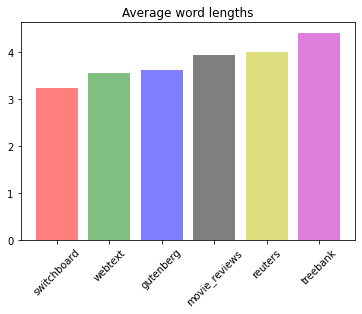

In [31]:
avg_word_lengths = {}
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    avg_word_lengths[corpus] = average_word_length(words)
ordered_bar_from_dict(avg_word_lengths,"Average word lengths")

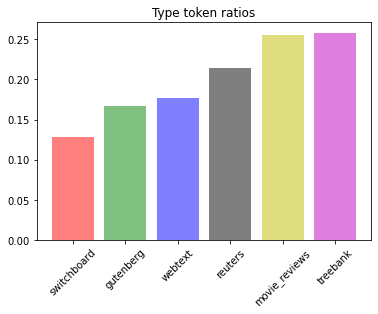

In [32]:
ttrs = {}
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    ttrs[corpus] = type_token_ratio(words,10000)
ordered_bar_from_dict(ttrs,"Type token ratios")

Let's talk a little bit about what we see in these graphs, and how it reflects the differences between corpora...

What if we want to identify individual words (or other linguistic features) that are particularly important in one corpus relative to another.  We are going to do this for just two very different corpora, gutenberg and webtext. Let's go back to our word (unigram) probabilities from the beginning of the lecture. First, we build them for each corpus:

In [33]:
def get_unigram_probs(words):
    '''get unigram probabilities for the words in a corpus'''
    counts = Counter(word.lower() for word in words)
    total = sum(counts.values())
    return {word:count/total for word,count in counts.items()}
    

In [34]:
web_probs = get_unigram_probs(webtext.words())
guten_probs = get_unigram_probs(gutenberg.words())

There are two natural, relatively direct ways to use these probabilities to identify words that are characteristic of the two corpora. One is to rank the words by the _difference_ between probabilities, and the other is to rank the words by the _ratio_ of the probabilities. Both will work, but they lead to different results.  

In [35]:
def subtract_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the difference of probabilities (prob1 - prob2)
    for words that appear in either dictionary'''
    all_words = set(prob1.keys())
    all_words.update(prob2.keys())
    return {word:prob1.get(word,0) - prob2.get(word,0) for word in all_words}


In [36]:
sub_dict = subtract_probs(guten_probs,web_probs)
sub_sorted_words = sorted(sub_dict.keys(),key=lambda x: sub_dict[x])

In [37]:
print(sub_sorted_words[:50])

["'", ':', '.', '#', 'i', 'you', '?', 't', '!', 'girl', 'guy', 'on', '-', '1', 's', '...', '2', ']', '[', 'like', 'don', 'm', 'a', 'yeah', 'page', 'firefox', 'when', 'can', 'woman', 'just', 're', 'get', 'chick', 'does', 'new', 'no', '(', ')', 'window', 'bookmarks', 'open', 'doesn', 'teen', 'firebird', 'cell', 'know', 'is', 'menu', 'tab', 'bar']


In [38]:
print(sub_sorted_words[-50:])

['men', 'from', 'house', 'hath', 'israel', 'before', 'king', 'will', 'at', '--', 'came', 'she', 'god', 'upon', 'but', ',"', 'ye', '."', 'with', 'thee', 'were', 'in', 'thy', 'by', 'to', 'thou', 'their', 'for', 'all', 'they', 'be', 'her', 'which', 'had', 'said', 'them', 'lord', 'unto', 'as', 'him', 'that', 'was', 'shall', 'he', 'his', ';', 'of', 'and', 'the', ',']


When we subtract probabilities, we tend to get a lot of very common words (since these words have high probabilities to begin with).

Next, the ratio method. One problem with the ratio is the potential for divide by zero errors, hence we will only look at the shared vocabulary:  

In [39]:
def divide_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the ratios of probabilities (prob1/prob2)
    for each word included in both'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:prob1.get(word,0)/prob2.get(word,0) for word in all_words}

In [40]:
div_dict = divide_probs(guten_probs,web_probs)
div_sorted_words = sorted(div_dict.keys(),key=lambda x: div_dict[x])

In [41]:
print(div_sorted_words[:50])

['guy', '0', 'clicking', 'tourist', 'folder', '+', 'download', 'password', 'dad', 'option', 'turner', 'install', 'phoenix', 'default', 'bitch', 'user', 'html', '?...', 'location', 'os', 'status', 'auto', 'context', 'bug', 'focus', 'settings', 'click', 'anymore', 'extension', 'disable', 'installed', 'pussy', 'delete', 'site', '***', 'jewish', 'cashier', 'cute', 'cop', 'loading', 'cancel', 'program', '<', '>', 'font', 'fails', 'yo', 'data', 'blocking', 'via']


In [42]:
print(div_sorted_words[-50:])

['21', 'wrath', 'sight', 'ark', '19', 'offering', 'sin', 'abraham', ',"', 'offerings', 'cried', 'pharaoh', 'grace', 'among', '22', 'princes', 'elliot', 'receive', 'stood', 'angel', 'wilderness', '27', 'solomon', 'spirits', 'shalt', 'mercy', 'aaron', 'shall', 'whom', 'israel', '14', 'praise', 'wherefore', '29', 'spoken', 'replied', 'commanded', 'behold', 'thou', 'sons', 'spake', 'thus', 'therefore', 'mrs', 'thine', 'thy', 'thee', 'hast', 'whale', 'ye']


The words found using ratios are more distinctive, but there is also noise, because it includes some very low probability types.

Question: What's a possible quick solution to this problem of noise?

Answer: We could remove words with low counts in one or both corpora

As it happens, there are more sophisticated statistical methods that find a better balance between these two extremes (being biased neither towards extremely common nor extremely rare words), but we'll stop here for now... 

## T/F Questions

1. When we want to compare two corpora, it is important to always take an equal-sized sample. T
2. The `sort` function returns a sorted version of the list passed to it.  F(We would use `sorted` then)
3. Type-token ratio will be high for a corpus if the vocabulary is relatively large.  F
4. Calculation of lexical density requires POS tagging.   T
4. If we compare corpora by taking the difference between unigram probabilities, we are unlikely to see very rare words at the top of our list.   T (It's ranked by descending order, so we will see the most common words at the top.)